# Palmer Penguins

This notebook contains an analysis of the Palmer penguin dataset (Horst AM, Hill AP, Gorman KB, 2020). This dataset was created as a intro dataset for data analysis and exploration. 
- https://allisonhorst.github.io/palmerpenguins/

First read in the dataset from a csv file. This can be done with a package called pandas. Pandas is a data analysis library for Python.
- https://pandas.pydata.org/docs/getting_started/overview.html.



In [1]:
import pandas as pd

df = pd.read_csv("./palmerpenguins_dataset.csv")

Pandas has read the dataset in as a dataframe ie a two dimensional array - rows and columns. 
- https://pythonbasics.org/pandas-dataframe/
- https://pandas.pydata.org/docs/reference/frame.html

Now have a look inside the dataframe at the headers:

In [2]:
header = df.columns.tolist()
print(header)

['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']


We can see the column headings, one of which is sex. Lets try make a barchart to see how many of the penguins in the dataset are male and how many are female. **not working, need to count number of male and number of female first somehow. nunique?
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html

In [4]:
df.nunique()

species                3
island                 3
bill_length_mm       164
bill_depth_mm         80
flipper_length_mm     55
body_mass_g           94
sex                    2
dtype: int64

This has counted the number of unique entries in each column. I need to count how many of each unique entries there are. Maybe with Dataframe.count:
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html

In [5]:
df.count()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
dtype: int64

There must be missing entries as some columns have more entries than others. 

value_counts

In [ ]:
gender_count = df['sex'].value_counts()
print(gender_count)

Pandas has a buoilt in plot function 'plot'. This uses another package call matplotlib.

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html

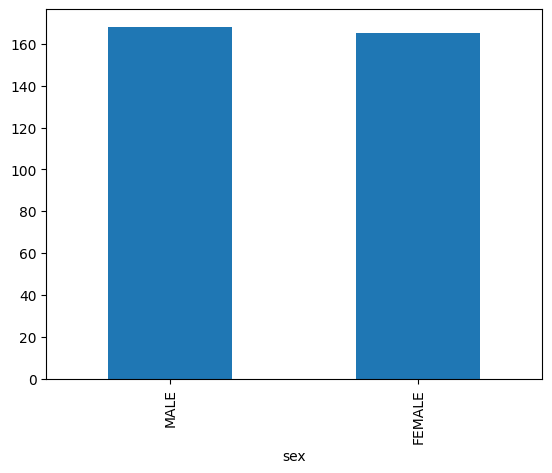

In [16]:
ax = gender_count.plot.bar(x='sex')